# T / S Heatmap for fast_run()

In [1]:
using CSV
using DataFrames
using Dates
using Glob
using Plots
using Plots.PlotMeasures: mm
using StatsBase: mean

include("../src/SimPlot.jl")
using Main.SimPlot: COLOR_MAP, get_value

In [2]:
function load(csv_file_names::Vector{String})::DataFrame
    df_vec = [CSV.File("../output/$(csv_file_name).csv") |> DataFrame for csv_file_name in csv_file_names]
    df = vcat(df_vec...)

    return df
end

function transform(df::DataFrame, keys::Vector{String})
    df = combine(groupby(df, keys), :cooperation_rate => mean => :cooperation_rate, :cooperation_rate => length => :count)
    
    println("nrow: $(nrow(df)), max: $(maximum(df.count)), mean: $(round(mean(df.count), digits=3)), min: $(minimum(df.count))")
    
    # return sort(df, [:variability_mode, :β, :sigma, :initial_T, :S])
    return sort(df, [:variability_mode, :β, :initial_T, :S])
end

function plot_TS_heatmap(df::AbstractDataFrame, title::String = "", colorbar::Bool = false)::Plots.Plot
    T = sort(unique(df.initial_T))
    S = sort(unique(df.S))
    
    mat = reshape([get_value(df, t, s, :initial_T, :S, :cooperation_rate) for s in S, t in T], length(S), length(T))
    
    p = heatmap(
        T,
        S,
        mat,
        title = title,
        titlefontsize = 9,
        # xlabel = "T",
        # ylabel = "S",
        xlims = (-0.05, 2.05),
        ylims = (-1.05, 1.05),
        color = COLOR_MAP,
        clims = (0.0, 1.0),
        colorbar = colorbar,
        xticks = 0:0.2:2,
        yticks = -1:0.2:1,
        # tickfontsize = 24,
        # guidefontsize = 36,
        # left_margin = 4 * Plots.PlotMeasures.mm,
        # bottom_margin = 1 * Plots.PlotMeasures.mm,
        # size=(1250, 1000),
    )
    plot!([-0.05, 2.05], [0, 0], color = :black, lw = 1, legend = false)
    plot!([1, 1], [-1.05, 1.05], color = :black, lw = 1, legend = false)

    # plot!([1.75, 2.05], [-0.75, -0.75], color = :black, lw = 1, legend = false)
    # plot!([1.75, 1.75], [-1.05, -0.75], color = :black, lw = 1, legend = false)

    
    plot!([2.05, 2.05], [-1.05, 1.05], color = :black, lw = 1, legend = false)
    plot!([-0.05, 2.05], [1.05, 1.05], color = :black, lw = 1, legend = false)

    return p
end;

nrow: 605, max: 50, mean: 50.0, min: 50


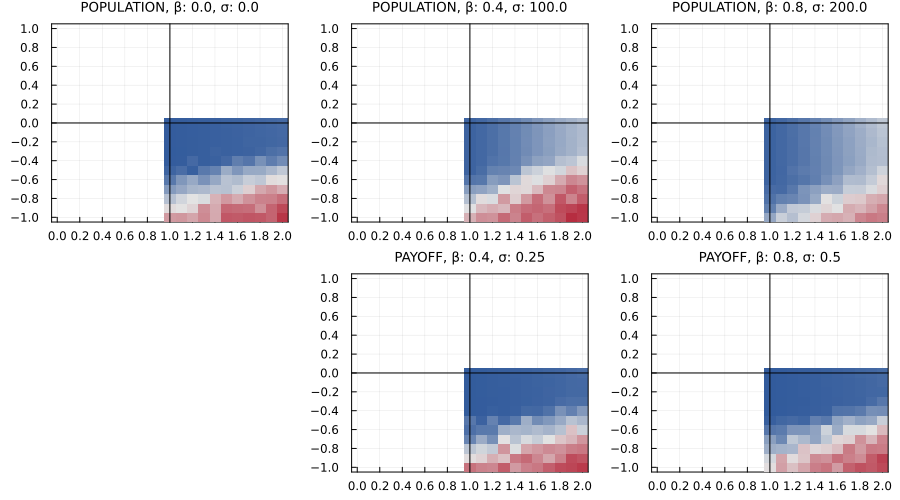

In [3]:
df = load([
    "20240202_164103", # β_sigma_vec = [(0.0, 0.0)], variability_mode = POPULATION
    "20240202_233127", # β_sigma_vec = [(0.4, 100.0)], variability_mode = POPULATION
    "20240202_234959", # β_sigma_vec = [(0.8, 200.0)], variability_mode = POPULATION
    "20240202_234227", # β_sigma_vec = [(0.4, 0.25)], variability_mode = PAYOFF
    "20240203_230404", # β_sigma_vec = [(0.8, 0.5)], variability_mode = PAYOFF
])
df = transform(df, names(df)[1:15])
plots = [plot_TS_heatmap(grouped_df, "$(grouped_df.variability_mode[1]), β: $(grouped_df.β[1]), σ: $(grouped_df.sigma[1])")
    for grouped_df in groupby(df, [:β, :sigma, :variability_mode])]
plot_dummy = plot(border=:none)
plot(plots[3], plots[4], plots[5], plot_dummy, plots[1], plots[2], layout = (2, 3), size = (900, 500))

In [4]:
df[df.initial_T .== 1.8 .&& df.S .== -0.8, [:variability_mode, :β, :sigma, :cooperation_rate]]

Row,variability_mode,β,sigma,cooperation_rate
,String15,Float64,Float64,Float64
1,PAYOFF,0.4,0.25,0.290478
2,PAYOFF,0.8,0.5,0.312045
3,POPULATION,0.0,0.0,0.251594
4,POPULATION,0.4,100.0,0.141958
5,POPULATION,0.8,200.0,0.432738


nrow: 441, max: 37, mean: 11.234, min: 1


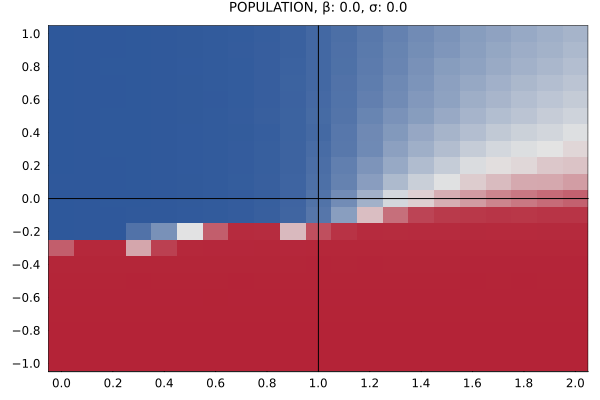

In [5]:
df = load([
    "20240206_231948",
    "20240206_231949",
    "20240206_235049",
    "20240206_235100",
])
df = transform(df, names(df)[1:15])
plots = [plot_TS_heatmap(grouped_df, "$(grouped_df.variability_mode[1]), β: $(grouped_df.β[1]), σ: $(grouped_df.sigma[1])")
    for grouped_df in groupby(df, [:β, :sigma, :variability_mode])]
plot_dummy = plot(border=:none)
plots[1]

nrow: 173, max: 10, mean: 4.069, min: 1


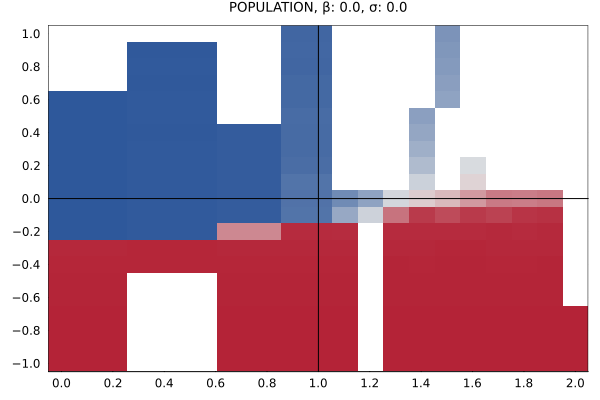

In [6]:
df = load([
    "20240214_114808",
    "20240214_114845",
    "20240214_155203",
    "20240214_155222"
])
df = transform(df, names(df)[1:15])
plots = [plot_TS_heatmap(grouped_df, "$(grouped_df.variability_mode[1]), β: $(grouped_df.β[1]), σ: $(grouped_df.σ[1])")
    for grouped_df in groupby(df, [:β, :σ, :variability_mode])]
plot_dummy = plot(border=:none)
plots[1]